<a href="https://colab.research.google.com/github/poonamkhot123/Linear-Regression/blob/main/Polynomial_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression,SGDRegressor

# for polynomial Regression.
from sklearn.preprocessing import PolynomialFeatures,StandardScaler

from sklearn.metrics import r2_score

from sklearn.pipeline import Pipeline
import plotly.graph_objects as go

In [8]:
x = 6 * np.random.rand(200,1)  - 3
y = 0.8 * x**2 + 0.9 * x+2 + np.random.randn(200,1)

# y = 0.8x^2 + 0.9x +2  ( it is a ploynomial of degree 2)

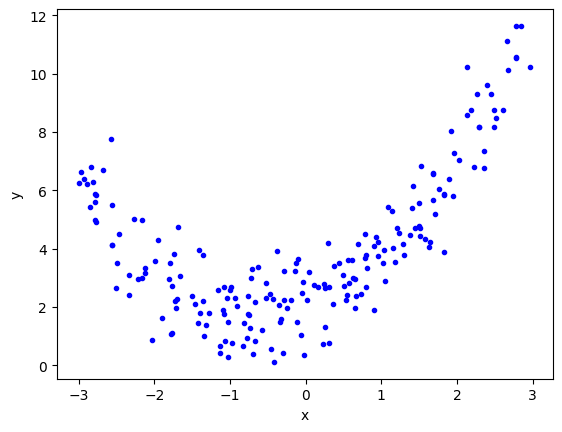

In [9]:
plt.plot(x,y,'b.')
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [10]:
# Train test split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state =2)

In [11]:
# first apply linear Regression
lr = LinearRegression()

In [12]:
lr.fit(x_train,y_train)

LinearRegression()

In [13]:
y_pred = lr.predict(x_test)
r2_score(y_test,y_pred)

0.2938025299197057

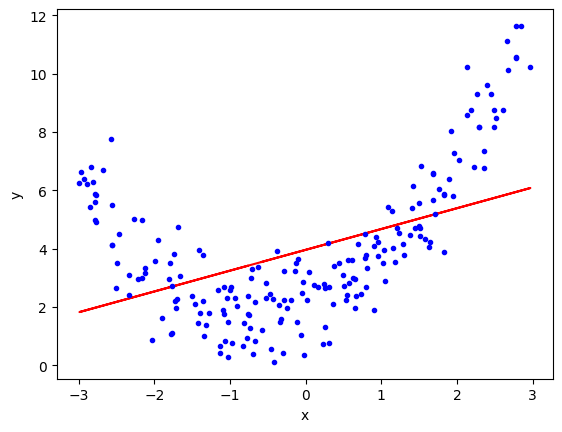

In [14]:
plt.plot(x_train,lr.predict(x_train),color='r')
plt.plot(x,y,'b.')
plt.xlabel('x')
plt.ylabel('y')
plt.show( )

In [17]:
# Applying polynomial linear regression
# degree = 2
poly = PolynomialFeatures(degree=2,include_bias=True)

x_train_trans = poly.fit_transform(x_train)
x_test_trans = poly.transform(x_test)

In [16]:
print(x_train[0])
print(x_train_trans[0])

[-0.582109]
[ 1.         -0.582109    0.33885089]


In [ ]:
# include_bias Parameter

In [19]:
lr = LinearRegression()

In [20]:
lr.fit(x_train_trans,y_train)

LinearRegression()

In [21]:
y_pred = lr.predict(x_test_trans)

In [22]:
r2_score(y_test,y_pred)

0.9059938851059999

In [23]:
print(lr.coef_)
print(lr.intercept_)

[[0.95414696 0.766677  ]]
[2.07419958]


In [24]:
x_new=np.linspace(-3,3,200).reshape(200,1)
x_new_poly = poly.transform(x_new)
y_new = lr.predict(x_new_poly)

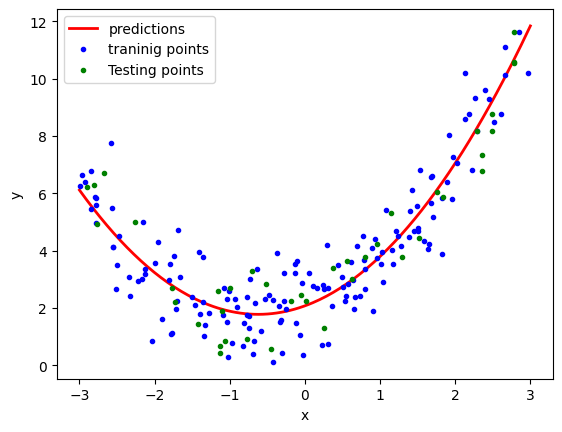

In [25]:
plt.plot(x_new,y_new,"r-",linewidth=2,label="predictions")
plt.plot(x_train,y_train,"b.",label="traninig points")
plt.plot(x_test,y_test,'g.',label='Testing points')
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

In [30]:
def polynomial_regression(degree):
  x_new=np.linspace(-3,3,100).reshape(100,1)
  x_new_poly = poly.transform(x_new)

  polybig_features = PolynomialFeatures(degree=degree,include_bias=False)
  std_scaler = StandardScaler()
  lin_reg = LinearRegression()

  polynomial_regression = Pipeline([
      ("poly_features",polybig_features),
      ("std_scaler",std_scaler),
      ("lin_reg",lin_reg)
  ])

  polynomial_regression.fit(x,y)

  y_newbig = polynomial_regression.predict(x_new)
  plt.plot(x_new,y_newbig,'r',label='Degree'+str(degree),linewidth=2)

  plt.plot(x_train,y_train,'b.',linewidth=3)
  plt.plot(x_test,y_test,'g.',linewidth=3)
  plt.legend(loc='upper left')
  plt.xlabel('x')
  plt.ylabel('y')
  plt.legend()
  plt.show()

In [29]:
polynomial_regression(4)

NameError: name 'Flase' is not defined

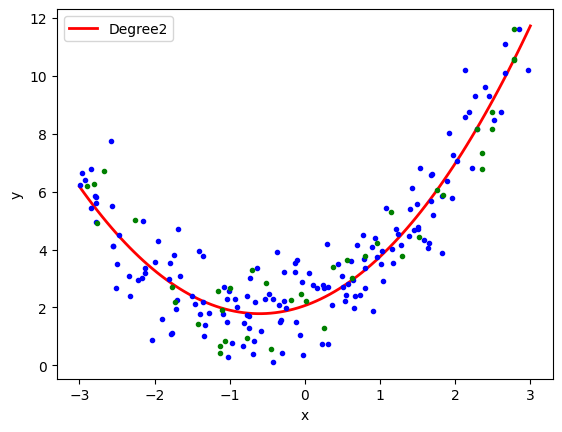

In [38]:
polynomial_regression(2)

In [39]:
# 3D polynomial regression
x = 7 * np.random.rand(100,1) - 2.8
y = 7 * np.random.rand(100,1) - 2.8

z = x**2 + y**2 + 0.2*y + 0.1*x*y+2 + np.random.randn(100,1)
# z = x^2 + y^2 +0.2x + 0.2y + 0.1xy +2

In [41]:
import plotly.express as px
df = px.data.iris()
fig = px.scatter_3d(df,x=x.ravel(),y=y.ravel(),z=z.ravel())
fig.show()

In [42]:
x_multi = np.array([x,y]).reshape(100,2)
x_multi.shape

(100, 2)

In [43]:
poly = PolynomialFeatures(degree=2)
x_multi_trans = poly.fit_transform(x_multi)

In [47]:
print("input",poly.n_features_in_)
print("output",poly.n_output_features_)
print("Powers\n",poly.powers_)

input 2
output 6
Powers
 [[0 0]
 [1 0]
 [0 1]
 [2 0]
 [1 1]
 [0 2]]


In [48]:
x_multi_trans.shape

(100, 6)

In [49]:
lr = LinearRegression()
lr.fit(x_multi_trans,z)

LinearRegression()

In [53]:
x_test_multi_trans = poly.transform(x_test_multi)

In [54]:
x_train_multi,x_test_multi,z_train,z_test = train_test_split(x_multi,z,test_size=0.2,random_state=2)

In [55]:
z_final = lr.predict(x_multi_trans).reshape(10,10)


In [59]:
x_input = np.linspace(x.min(), x.max(), 10)
y_input = np.linspace(y.min(), y.max(), 10)

fig = px.scatter_3d(x=x.ravel(),y=y.ravel(),z=z.ravel())
fig.add_trace(go.Surface(x=x_input,y=y_input,z=z_final))
fig.update_layout(scene=dict(zaxis=dict(range=[0,35])))
fig.show()